# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset

In [2]:
df = pd.read_csv(r"C:\Users\Digambar\Desktop\ML project\Datasets\combined_sectors.csv")

df.shape

(24, 5)

## Dataset comprises 4 major sector like:-

### 1. Agriculture sector maintains records of  Agriculture, forestry, and fishing.
### 2. Manufacturing sector includes files of Manufacturing of Automobile, Textile & Apparel, Pharmaceuticals, and many others.
### 3. Industry sector consists of information of Construction, Mining and utilities.
### 4. Data of Service sector comprises those of Financial Services, IT and ITeS, Trade, Hotels, Tourism, Health, Education and many others.

### All figures in %

In [3]:
df.head(2)

,Year,Agriculture,Manufacturing,Industry,Services
0,2000,21.611062,15.927023,27.325828,42.732927
1,2001,21.618885,15.307021,26.487777,43.808961


# Create binary target variable

In [15]:
df['Target'] = (df['Services'] > 45).astype(int)

# Visualizing historical sectoral contributions

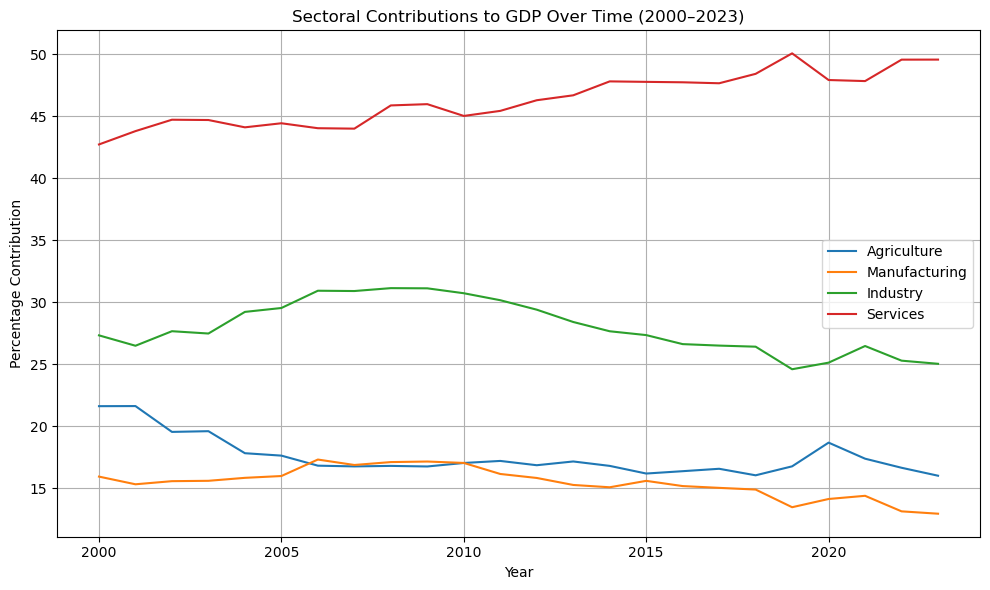

In [16]:
plt.figure(figsize=(10, 6))
for sector in ['Agriculture', 'Manufacturing', 'Industry', 'Services']:
    plt.plot(df['Year'], df[sector], label=sector)
plt.title('Sectoral Contributions to GDP Over Time (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. Service sector consistently increased or held a dominant share of GDP.

### 2. Agriculture shows a gradual decline typical of developing to indusrial economics

### 3. Manufacturing and Industry remain relatively flat, showing limited structural shift despite policy efforts like Make in India, launched in 2014.

### 4. The lack of significant manufacturing growth supports the concern that diversification is slow.

# Visualize classification over time 

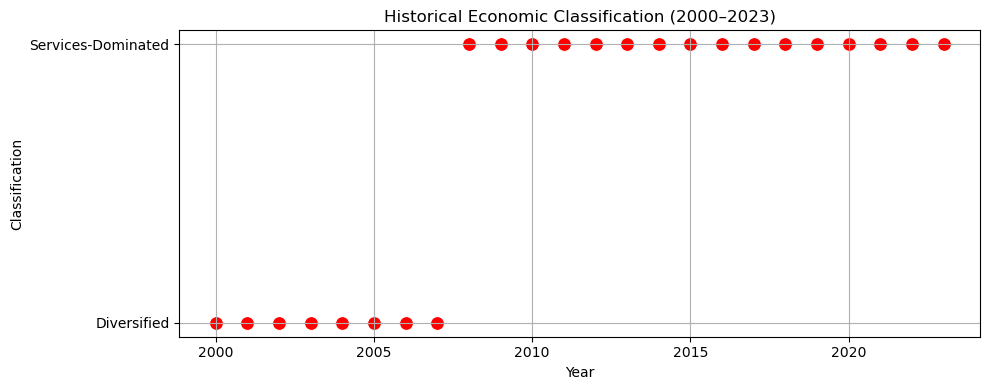

In [17]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Year', y='Target', data=df, s=100, color='red')
plt.yticks([0, 1], ['Diversified', 'Services-Dominated'])
plt.title('Historical Economic Classification (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Classification')
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. Most years from 2000 onward were classified as service dominated.

### 2. A few earlier years (early 2000s) are marked as diversified, but the trend quickly favors services.

### 3. The above visual indicating a persistent and increasing reliance on services, with little sign of reversal over two decades.

# Prepare data for modeling

In [19]:
X = df[['Agriculture', 'Manufacturing', 'Industry', 'Services']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression Model

In [20]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# Evaluate on test set

In [21]:
y_pred = logreg_model.predict(X_test_scaled)
print("\n Test Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Classification Report:\n", classification_report(y_test, y_pred))


 Test Accuracy: 100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Cross validation for Real world performance

In [22]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg_model, scaler.fit_transform(X), y, cv=cv, scoring='accuracy')

print("\n Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", round(np.mean(cv_scores) * 100, 2), "% ±", round(np.std(cv_scores) * 100, 2))


 Cross-Validation Accuracy Scores: [1.  0.8 1.  1.  1. ]
Mean Accuracy: 96.0 % ± 8.0


# Forecast sector values (2024–2030) using linear regression

In [23]:
future_years = np.arange(2024, 2031).reshape(-1, 1)
historical_years = df['Year'].values.reshape(-1, 1)

sector_forecasts = {}
for sector in ['Agriculture', 'Manufacturing', 'Industry', 'Services']:
    model = LinearRegression()
    model.fit(historical_years, df[sector])
    sector_forecasts[sector] = model.predict(future_years)

# Building future dataframe, predicting future classification using logistic regression and Visualizing future forecasted sector trends

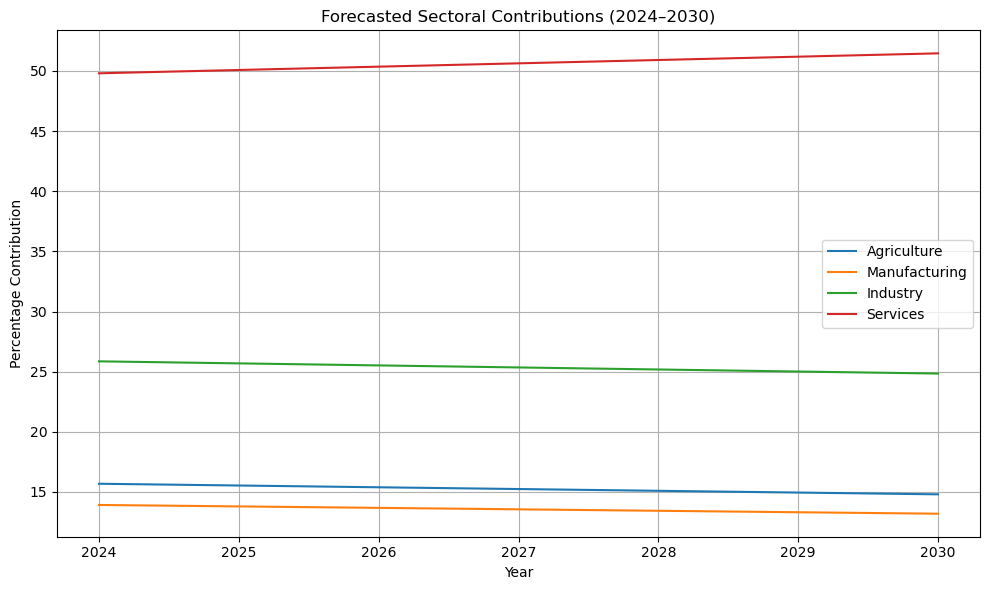

In [25]:
future_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Agriculture': sector_forecasts['Agriculture'],
    'Manufacturing': sector_forecasts['Manufacturing'],
    'Industry': sector_forecasts['Industry'],
    'Services': sector_forecasts['Services']
})

X_future = future_df[['Agriculture', 'Manufacturing', 'Industry', 'Services']]
X_future_scaled = scaler.transform(X_future)
future_df['LogReg_Predicted_Target'] = logreg_model.predict(X_future_scaled)
future_df['LogReg_Classification'] = future_df['LogReg_Predicted_Target'].map({1: 'Services Dominated', 0: 'Diversified'})

plt.figure(figsize=(10, 6))
for sector in ['Agriculture', 'Manufacturing', 'Industry', 'Services']:
    plt.plot(future_df['Year'], future_df[sector], label=sector)
plt.title('Forecasted Sectoral Contributions (2024–2030)')
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. Services continue to dominate and grow slowly reaching around 51%.

### 2. Agriculture and Manufacturing maintain downward or flat trajectories.

### 3. This suggests no major structural economic shift  is expected through 2030, under current trends.

### 4. Forecast reinforce the idea that manufacturing and industry policy impacts remain limited, unless there are substantial reforms implemented.

# Visualizing logistic regression classification (2024–2030)

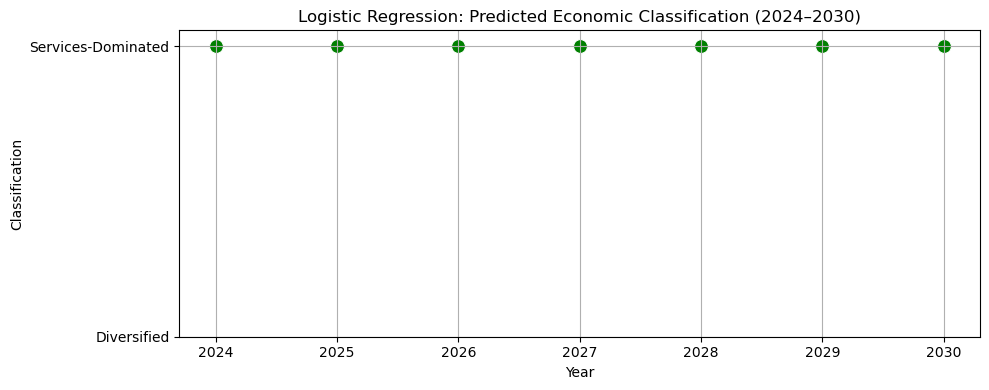

In [26]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Year', y='LogReg_Predicted_Target', data=future_df, s=100, color='green')
plt.yticks([0, 1], ['Diversified', 'Services-Dominated'])
plt.title('Logistic Regression: Predicted Economic Classification (2024–2030)')
plt.xlabel('Year')
plt.ylabel('Classification')
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. The model predicts that every year from 2024 to 2030 will continue to be service dominated.

### 2. This is a concerning signal for industrial diversification goals, the economy is not projected to rebalance without intervention.

### 3. India's long term reliance on services may increase vulnerability to global service sector slowdowns.

In [27]:
print("\n Forecasted Economic Classification (2024–2030):")
print(future_df[['Year', 'Agriculture', 'Manufacturing', 'Industry', 'Services', 'LogReg_Classification']])


 Forecasted Economic Classification (2024–2030):
   Year  Agriculture  Manufacturing   Industry   Services  \
0  2024    15.685879      13.923261  25.862462  49.807292   
1  2025    15.539239      13.801955  25.693091  50.083848   
2  2026    15.392599      13.680650  25.523720  50.360404   
3  2027    15.245959      13.559344  25.354348  50.636960   
4  2028    15.099319      13.438038  25.184977  50.913516   
5  2029    14.952679      13.316733  25.015606  51.190072   
6  2030    14.806039      13.195427  24.846234  51.466628   

  LogReg_Classification  
0    Services Dominated  
1    Services Dominated  
2    Services Dominated  
3    Services Dominated  
4    Services Dominated  
5    Services Dominated  
6    Services Dominated  


### 1. The model and visuals tells us that India's economy is not diversifying fast enough.

### 2. Service remains dominant, while manufacturing and agriculture lags.

### 3. Policy implications: Reforms, incentives, and investment in industrial sectors are needed to reshape the economic structure.

###  Comparison of Real vs. Predicted Data

### For 2024, the model predicts the following percentages for all sectors:
### - Services: 49.8%
### - Industry: 25.9%
### - Manufacturing: 13.9%
### - Agriculture: 15.7%

### The estimated real data for 2024 for these sectors is:
### - Services: 50.5%
### - Industry: 25.5%
### - Manufacturing: 14.0%
### - Agriculture: 15.0%

### For 2025, the model predicts the following percentages for all sectors:
### - Services: 50.1%
### - Industry: 25.7%
### - Manufacturing: 13.8%
### - Agriculture: 15.5%

### The estimated real data for 2025 is:
### - Services: 51.0%
### - Industry: 25.2%
### - Manufacturing: 14.1%
### - Agriculture: 14.7%

### All estimated real data are based on available government and RBI reports, IMF/WB projections, and economic surveys as of mid 2025.

## Note:- 
### The GDP of any country is determined through an interplaying web of home and foreign influences and cannot be decided through linear forecasts or history trends.
### The most significant influential factors are:
### Internal Dynamics such as Policy actions (Make in India, PLI plans), Infrastructure upgradation, shifts in domestic demand and consumption, new technologies, and shifts in workforce dynamics.

### External Factors such as events occurring in world markets and shifting trade relationships, Geopolitical tensions and supply disruptions, foreign investment trends, Climate change, and price volatility of major commodities.


#
# Thank You for your interest - Digambar R. Dewase